<a href="https://colab.research.google.com/github/EnzoPavez/Datasets-Pavez-Enzo/blob/main/Desafio_APIS_Pavez_Enzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 Instalamos la paquetería porque COLAB no la trae por defecto, una vez que ya la instalaron les puede tirar un error de Sintaxis pero ignorenlo, es su manera de decir que ya lo tiene listo.



In [1]:
pip3 install tweepy

SyntaxError: ignored

La importamos

In [23]:
import pandas as pd
import tweepy as tw

Le damos nuestras credenciales

In [24]:
consumer_key = "6eItzi7Tya5Q07F9gvRFs7f5e" #ingresar el propio
consumer_secret ="wGhpjWjDVNhU515liduJMadVhYANLJ6jIfpYOKsRZpbNd5OnbD" #ingresar el propio
access_token = "1126787840-FrDn4I7b8bsu6v6oidyxX2ttk5lClNjSqFLs4XR" #ingresar el propio
access_token_secret ="kDqNiGs6JZYlncDy9ccfvRtVow5KyMi3tHMrR253yfOlp" #ingresar el propio

Se autentica. Profe no me di cuenta y lo hice tantas veces que me consumi el limite que me da la API y estoy esperando que me validen nuevamente


In [25]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

Le paso la palabra que busco, cuantos post y cuando


In [27]:
search_words = "Dolar"
since_date = "2023-01-22"
until_date = "2023-06-08"
number_posts = 2000

Importe la libreria  TextBlod para realizar el análisis de sentimientos en el texto. 

In [28]:
from textblob import TextBlob

def get_sentiment(tweet_text):
    blob = TextBlob(tweet_text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        sentiment_label = "Positivo"
    elif sentiment_score < 0:
        sentiment_label = "Negativo"
    else:
        sentiment_label = "Neutro"
    
    return sentiment_label, sentiment_score


Aca genero la consulta con los parametros que quiero (Lo ejecute dos veces y ocupe el limite)

In [29]:
posts = []
tweets = tw.Cursor(api.search_tweets, q=search_words, lang="es", geocode="-38.416097,-63.616672,1000km", until=until_date).items(number_posts)
for tweet in tweets:
    sentiment_label, sentiment_score = get_sentiment(tweet.text)
    posts.append([tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.text, tweet.retweet_count, tweet.favorite_count, sentiment_label, sentiment_score])


TooManyRequests: ignored

In [50]:
len(posts)

2355

In [51]:
type(posts)

list

In [52]:
for k in posts:
  print(k)

[datetime.datetime(2023, 6, 7, 23, 40, 40, tzinfo=datetime.timezone.utc), 'dario_bevacqua', 'Buenos Aires, Argentina', 'Reducir el piso es un eufemismo para bajar costos laborales: despedir personal, congelar salarios suspendiendo pari… https://t.co/iV6sbXGyia', 0, 0, 'Neutro', 0.0]
[datetime.datetime(2023, 6, 7, 23, 38, 55, tzinfo=datetime.timezone.utc), 'lacapitalmdq', 'Mar del Plata, Argentina', 'A cuánto cerró el dólar blue este miércoles en Mar del Plata\n\nhttps://t.co/VwhlXjWSTf', 0, 1, 'Neutro', 0.0]
[datetime.datetime(2023, 6, 7, 23, 37, 40, tzinfo=datetime.timezone.utc), 'A24COM', 'Buenos Aires, Argentina', '🚨 Plan "llegar a agosto" sin dólar disparado: las claves de la negociaciones con el FMI\n\n"El Fondo está bajo una pr… https://t.co/tasJ33eHNZ', 0, 9, 'Neutro', 0.0]
[datetime.datetime(2023, 6, 7, 23, 37, 24, tzinfo=datetime.timezone.utc), 'Jaquelin_ef', 'Ituzaingó, Buenos Aires', '@PalomiCoral Sos de Paraguay? Un dólar son más de 7mil guaraníes, el chiste se cuenta solo 

Lo paso un DataFrame (Deje este dataframe para que vean que funciona con 1000 filas)

In [34]:
df = pd.DataFrame(posts)

In [35]:
df.columns = ['Fecha', 'Usuario', 'Localizacion','Tweet','RT','Favorito','sentimiento','sentiment']

In [36]:
df

,Fecha,Usuario,Localizacion,Tweet,RT,Favorito,sentimiento,sentiment
0,2023-06-07 23:40:40+00:00,dario_bevacqua,"Buenos Aires, Argentina",Reducir el piso es un eufemismo para bajar cos...,0,0,Neutro,0.0
1,2023-06-07 23:38:55+00:00,lacapitalmdq,"Mar del Plata, Argentina",A cuánto cerró el dólar blue este miércoles en...,0,1,Neutro,0.0
2,2023-06-07 23:37:40+00:00,A24COM,"Buenos Aires, Argentina","🚨 Plan ""llegar a agosto"" sin dólar disparado: ...",0,9,Neutro,0.0
3,2023-06-07 23:37:24+00:00,Jaquelin_ef,"Ituzaingó, Buenos Aires",@PalomiCoral Sos de Paraguay? Un dólar son más...,0,22,Neutro,0.0
4,2023-06-07 23:36:49+00:00,NelsonPirolo,"Buenos Aires, Argentina",@LANACION Pero en 2019 nos dijiste que venías ...,0,1,Neutro,0.0
...,...,...,...,...,...,...,...,...
2350,2023-05-31 15:15:12+00:00,GabrielGiannar1,Tandil Argentina,@MarisaKlos 70 céntimos de dólar \nUn regalo,0,0,Neutro,0.0
2351,2023-05-31 15:05:00+00:00,gigijaz94,"Buenos Aires, Argentina",@cocoscap compro dólares y al otro dia recibo ...,0,0,Neutro,0.0
2352,2023-05-31 15:04:46+00:00,Gustavo__Olmos,"Bahía Blanca, Argentina","En la década de 1960, Eastwood alcanzó la fama...",0,10,Neutro,0.0
2353,2023-05-31 15:02:56+00:00,LaLetraChicaOk,"Buenos Aires, Argentina",La tercera edición del dólar soja llega a su f...,0,0,Neutro,0.0


In [37]:
df.shape # Dimensiones del conjunto de datos


(2355, 8)

In [38]:
df.columns

Index(['Fecha', 'Usuario', 'Localizacion', 'Tweet', 'RT', 'Favorito',
       'sentimiento', 'sentiment'],
      dtype='object')

In [39]:
df.head()

,Fecha,Usuario,Localizacion,Tweet,RT,Favorito,sentimiento,sentiment
0,2023-06-07 23:40:40+00:00,dario_bevacqua,"Buenos Aires, Argentina",Reducir el piso es un eufemismo para bajar cos...,0,0,Neutro,0.0
1,2023-06-07 23:38:55+00:00,lacapitalmdq,"Mar del Plata, Argentina",A cuánto cerró el dólar blue este miércoles en...,0,1,Neutro,0.0
2,2023-06-07 23:37:40+00:00,A24COM,"Buenos Aires, Argentina","🚨 Plan ""llegar a agosto"" sin dólar disparado: ...",0,9,Neutro,0.0
3,2023-06-07 23:37:24+00:00,Jaquelin_ef,"Ituzaingó, Buenos Aires",@PalomiCoral Sos de Paraguay? Un dólar son más...,0,22,Neutro,0.0
4,2023-06-07 23:36:49+00:00,NelsonPirolo,"Buenos Aires, Argentina",@LANACION Pero en 2019 nos dijiste que venías ...,0,1,Neutro,0.0


In [40]:
df.isnull().sum()

Fecha           0
Usuario         0
Localizacion    0
Tweet           0
RT              0
Favorito        0
sentimiento     0
sentiment       0
dtype: int64

In [41]:
df = df.drop_duplicates()  # Eliminar filas duplicadas

In [42]:
contador = df['sentimiento'].value_counts()
print("Cantidad de valores 'Neutro':", contador)

Cantidad de valores 'Neutro': Neutro      2279
Positivo      65
Negativo      11
Name: sentimiento, dtype: int64


In [43]:
resumen_columna = df['Favorito'].describe()
print(resumen_columna)

count     2355.000000
mean        16.352866
std        282.023529
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      10376.000000
Name: Favorito, dtype: float64


In [45]:
fila_valor = df.loc[df.eq(10376).any(axis=1)]
print(fila_valor)

                        Fecha       Usuario  Localizacion  \
817 2023-06-05 18:28:44+00:00  pechenkitaTV  Buenos Aires   

                                                 Tweet   RT  Favorito  \
817  Sí Messi se va al barca LE DOY UN DOLAR A CADA...  597     10376   

    sentimiento  sentiment  
817      Neutro        0.0  


In [49]:
fila_valor = df.loc[df.eq(10376).any(axis=1), ['Fecha', 'Tweet']]
print(fila_valor)

                        Fecha  \
817 2023-06-05 18:28:44+00:00   

                                                 Tweet  
817  Sí Messi se va al barca LE DOY UN DOLAR A CADA...  


In [56]:
# 5. Transformación de datos
# Cambiar el formato de fechas
df['Fecha'] = pd.to_datetime(df['Fecha']).dt.strftime('%d/%m/%Y')

In [57]:
df

,Fecha,Usuario,Localizacion,Tweet,RT,Favorito,sentimiento,sentiment
0,07/06/2023,dario_bevacqua,"Buenos Aires, Argentina",Reducir el piso es un eufemismo para bajar cos...,0,0,Neutro,0.0
1,07/06/2023,lacapitalmdq,"Mar del Plata, Argentina",A cuánto cerró el dólar blue este miércoles en...,0,1,Neutro,0.0
2,07/06/2023,A24COM,"Buenos Aires, Argentina","🚨 Plan ""llegar a agosto"" sin dólar disparado: ...",0,9,Neutro,0.0
3,07/06/2023,Jaquelin_ef,"Ituzaingó, Buenos Aires",@PalomiCoral Sos de Paraguay? Un dólar son más...,0,22,Neutro,0.0
4,07/06/2023,NelsonPirolo,"Buenos Aires, Argentina",@LANACION Pero en 2019 nos dijiste que venías ...,0,1,Neutro,0.0
...,...,...,...,...,...,...,...,...
2350,31/05/2023,GabrielGiannar1,Tandil Argentina,@MarisaKlos 70 céntimos de dólar \nUn regalo,0,0,Neutro,0.0
2351,31/05/2023,gigijaz94,"Buenos Aires, Argentina",@cocoscap compro dólares y al otro dia recibo ...,0,0,Neutro,0.0
2352,31/05/2023,Gustavo__Olmos,"Bahía Blanca, Argentina","En la década de 1960, Eastwood alcanzó la fama...",0,10,Neutro,0.0
2353,31/05/2023,LaLetraChicaOk,"Buenos Aires, Argentina",La tercera edición del dólar soja llega a su f...,0,0,Neutro,0.0


In [63]:
import numpy as np
import matplotlib.pyplot as plt


In [61]:
# 6. Manejo de outliers
# Identificar outliers utilizando el método de desviación estándar
desviacion_std = np.std(df['Favorito'])
umbral_outlier = 3  # Umbral para considerar un valor como outlier (puedes ajustarlo según tus necesidades)



In [62]:
# Filtrar filas con outliers
df_filtrado = df[abs(df['Favorito'] - np.mean(df['Favorito'])) < umbral_outlier * desviacion_std]

In [64]:
# Reemplazar outliers con valores NaN
df['Favorito'][abs(df['Favorito'] - np.mean(df['Favorito'])) >= umbral_outlier * desviacion_std] = np.nan

<ipython-input-64-fd11cce85235>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Favorito'][abs(df['Favorito'] - np.mean(df['Favorito'])) >= umbral_outlier * desviacion_std] = np.nan


In [65]:
# Graficar antes y después del filtrado de outliers
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Valor')

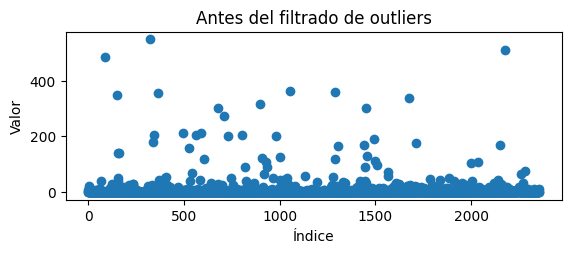

In [68]:
# Gráfico antes del filtrado de outliers
plt.subplot(2, 1, 1)
plt.scatter(range(len(df['Favorito'])), df['Favorito'])
plt.title('Antes del filtrado de outliers')
plt.xlabel('Índice')
plt.ylabel('Valor')

Text(0, 0.5, 'Valor')

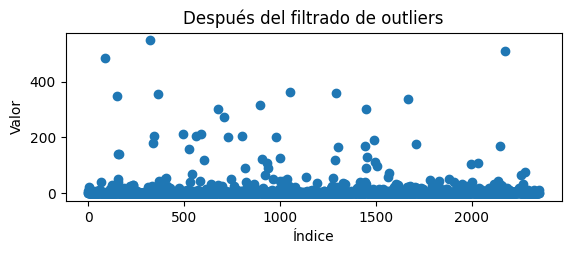

In [69]:
# Gráfico después del filtrado de outliers
plt.subplot(2, 1, 2)
plt.scatter(range(len(df_filtrado['Favorito'])), df_filtrado['Favorito'])
plt.title('Después del filtrado de outliers')
plt.xlabel('Índice')
plt.ylabel('Valor')

In [71]:
df

,Fecha,Usuario,Localizacion,Tweet,RT,Favorito,sentimiento,sentiment
0,07/06/2023,dario_bevacqua,"Buenos Aires, Argentina",Reducir el piso es un eufemismo para bajar cos...,0,0.0,Neutro,0.0
1,07/06/2023,lacapitalmdq,"Mar del Plata, Argentina",A cuánto cerró el dólar blue este miércoles en...,0,1.0,Neutro,0.0
2,07/06/2023,A24COM,"Buenos Aires, Argentina","🚨 Plan ""llegar a agosto"" sin dólar disparado: ...",0,9.0,Neutro,0.0
3,07/06/2023,Jaquelin_ef,"Ituzaingó, Buenos Aires",@PalomiCoral Sos de Paraguay? Un dólar son más...,0,22.0,Neutro,0.0
4,07/06/2023,NelsonPirolo,"Buenos Aires, Argentina",@LANACION Pero en 2019 nos dijiste que venías ...,0,1.0,Neutro,0.0
...,...,...,...,...,...,...,...,...
2350,31/05/2023,GabrielGiannar1,Tandil Argentina,@MarisaKlos 70 céntimos de dólar \nUn regalo,0,0.0,Neutro,0.0
2351,31/05/2023,gigijaz94,"Buenos Aires, Argentina",@cocoscap compro dólares y al otro dia recibo ...,0,0.0,Neutro,0.0
2352,31/05/2023,Gustavo__Olmos,"Bahía Blanca, Argentina","En la década de 1960, Eastwood alcanzó la fama...",0,10.0,Neutro,0.0
2353,31/05/2023,LaLetraChicaOk,"Buenos Aires, Argentina",La tercera edición del dólar soja llega a su f...,0,0.0,Neutro,0.0


In [72]:
# 7. Manipulación de columnas y filas
df = df.rename(columns={'sentimiento': 'Estado'})  # Renombrar columnas



In [74]:
df

,Fecha,Usuario,Localizacion,Tweet,RT,Favorito,Estado,sentiment
0,07/06/2023,dario_bevacqua,"Buenos Aires, Argentina",Reducir el piso es un eufemismo para bajar cos...,0,0.0,Neutro,0.0
1,07/06/2023,lacapitalmdq,"Mar del Plata, Argentina",A cuánto cerró el dólar blue este miércoles en...,0,1.0,Neutro,0.0
2,07/06/2023,A24COM,"Buenos Aires, Argentina","🚨 Plan ""llegar a agosto"" sin dólar disparado: ...",0,9.0,Neutro,0.0
3,07/06/2023,Jaquelin_ef,"Ituzaingó, Buenos Aires",@PalomiCoral Sos de Paraguay? Un dólar son más...,0,22.0,Neutro,0.0
4,07/06/2023,NelsonPirolo,"Buenos Aires, Argentina",@LANACION Pero en 2019 nos dijiste que venías ...,0,1.0,Neutro,0.0
...,...,...,...,...,...,...,...,...
2350,31/05/2023,GabrielGiannar1,Tandil Argentina,@MarisaKlos 70 céntimos de dólar \nUn regalo,0,0.0,Neutro,0.0
2351,31/05/2023,gigijaz94,"Buenos Aires, Argentina",@cocoscap compro dólares y al otro dia recibo ...,0,0.0,Neutro,0.0
2352,31/05/2023,Gustavo__Olmos,"Bahía Blanca, Argentina","En la década de 1960, Eastwood alcanzó la fama...",0,10.0,Neutro,0.0
2353,31/05/2023,LaLetraChicaOk,"Buenos Aires, Argentina",La tercera edición del dólar soja llega a su f...,0,0.0,Neutro,0.0


In [75]:
##df = df[df['RT'] > 10]  # Filtrar filas basadas en un criterio

In [76]:
df

,Fecha,Usuario,Localizacion,Tweet,RT,Favorito,Estado,sentiment
88,07/06/2023,javierlanari,"Buenos Aires, Argentina",Hay funcionarios que se están enriqueciendo co...,296,484.0,Neutro,0.0
153,07/06/2023,jmdanuzzo,"Buenos Aires, Argentina",¿Cuánto va a valer en 24 meses 1 dólar inverti...,27,349.0,Neutro,0.0
162,07/06/2023,SergioChouza,"Buenos Aires, Argentina.",¿Hasta dónde se dispararía el Dólar libre si e...,23,141.0,Neutro,0.0
322,07/06/2023,SergioChouza,"Buenos Aires, Argentina.",Sigue bajando el Dólar. Ya no lo ves todos los...,144,548.0,Neutro,0.0
337,06/06/2023,VeruskaHer,"Buenos Aires, Argentina","Argentina es el único país, luego de Venezuela...",176,178.0,Neutro,0.0
346,06/06/2023,carod2015,"Buenos Aires, Argentina",El Dólar Pesca se usará para ajustar salarios ...,40,205.0,Neutro,0.0
363,06/06/2023,aetchebarne,"Buenos Aires, Argentina",@BonelliOK Es un error de Grindetti enfrentar ...,44,357.0,Neutro,0.0
406,06/06/2023,danibigote,Buenos Aires,"""Tampoco hicimos nada para mejorar la justicia...",14,54.0,Neutro,0.0
497,06/06/2023,facusonatti,Buenos Aires,📌 ¿Cuánto valen los bancos argentinos dólar CC...,20,211.0,Neutro,0.0
525,06/06/2023,julianyosovitch,BUENOS AIRES,🇦🇷DOLARIZACION🇦🇷\n❌Los Bancos Centrales del mu...,35,158.0,Neutro,0.0


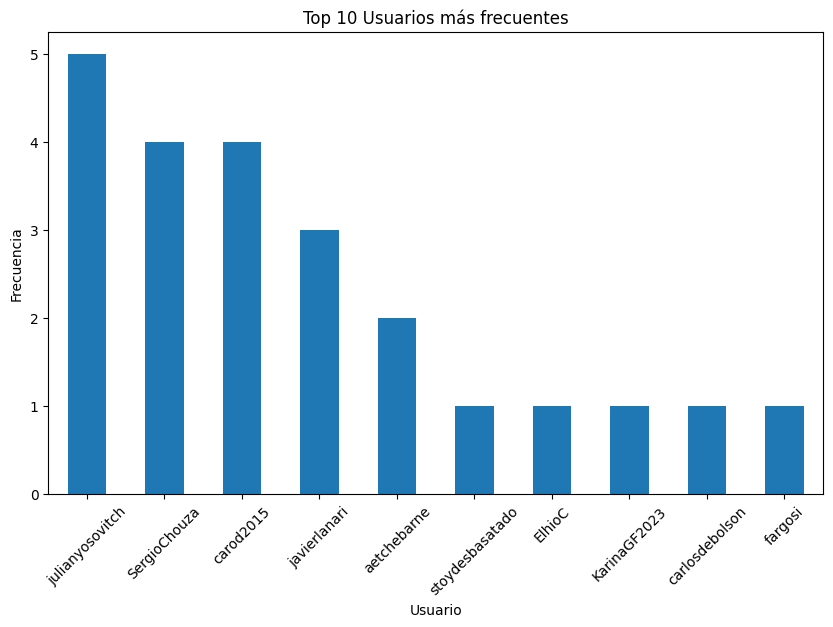

In [80]:
# Cuenta de usuarios únicos
users_count = df['Usuario'].nunique()
# Gráfico de barras
plt.figure(figsize=(10, 6))
df['Usuario'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Usuarios más frecuentes')
plt.xlabel('Usuario')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

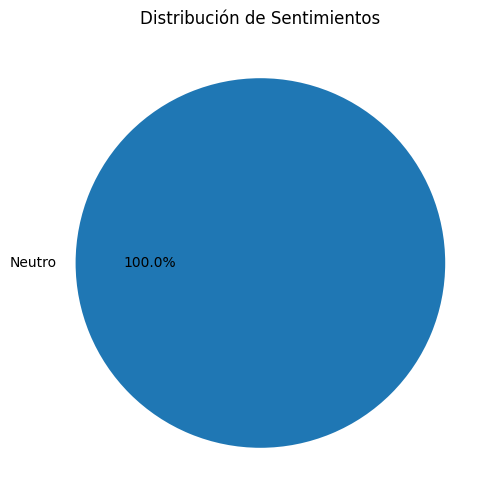

In [82]:
# Gráfico de torta
plt.figure(figsize=(8, 6))
df['Estado'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Sentimientos')
plt.ylabel('')
plt.show()

In [92]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

<ipython-input-92-b2441b61a9c9>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Fecha'] = pd.to_datetime(df['Fecha'])
<ipython-input-92-b2441b61a9c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = pd.to_datetime(df['Fecha'])


<Figure size 1200x600 with 0 Axes>

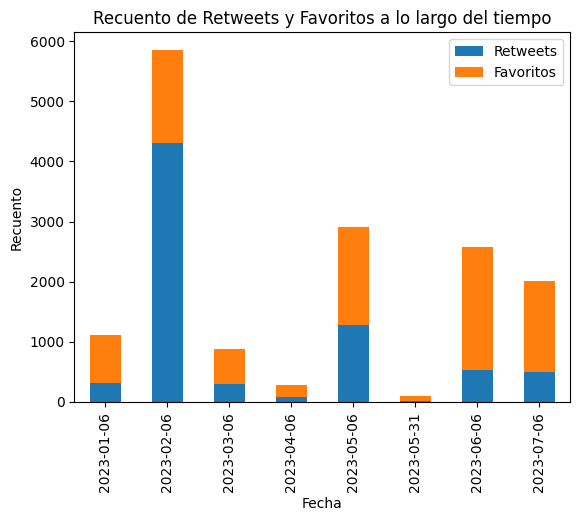

In [93]:
# Agrupar por fecha y sumar retweets y favoritos
rt_fav_counts = df.groupby(df['Fecha'].dt.date)[['RT', 'Favorito']].sum()

# Gráfico de barras apiladas
plt.figure(figsize=(12, 6))
rt_fav_counts.plot(kind='bar', stacked=True)
plt.title('Recuento de Retweets y Favoritos a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Recuento')
plt.legend(['Retweets', 'Favoritos'])
plt.show()

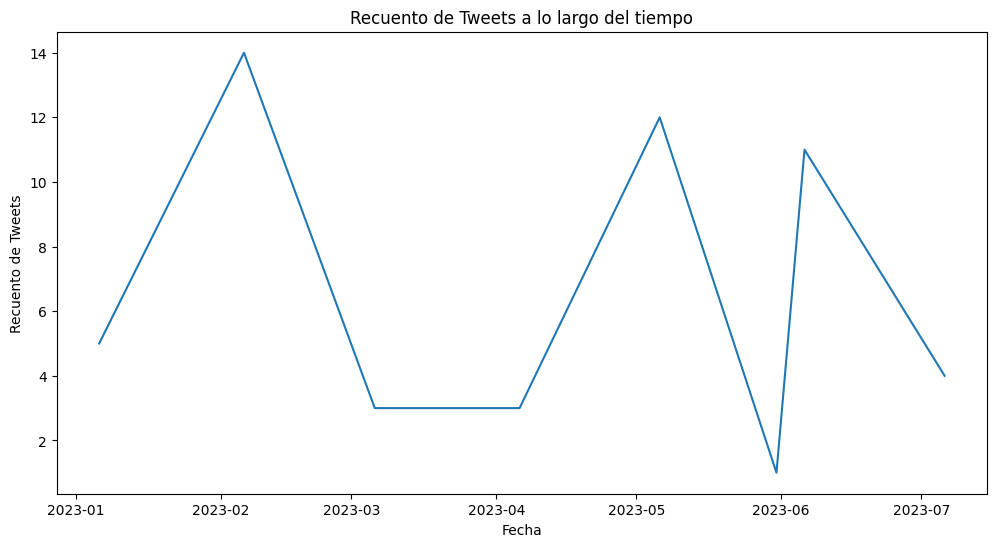

In [94]:
# Agrupar por fecha y contar el número de tweets
tweets_count = df.groupby(df['Fecha'].dt.date)['Tweet'].count()

# Gráfico de líneas
plt.figure(figsize=(12, 6))
tweets_count.plot()
plt.title('Recuento de Tweets a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Recuento de Tweets')
plt.show()